Introduction to Regression with Neural Networks in TensorFlow

THere are many definitions for a regression problem but in our case, we're going to simplify it:
predicting a numerical variable based on some other combination of variable, even shorter...predicting a number.

In [30]:
#Import TensorFlow

import tensorflow as tf

print(tf.__version__)



2.5.0


Creating data to view and fit


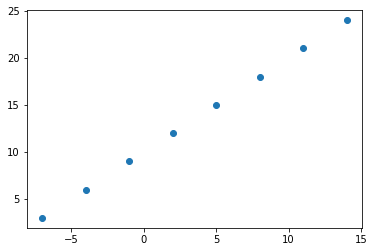

In [31]:
import numpy as np
import matplotlib.pyplot as plt

#Create Features

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
#Create Labels

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize It
plt.scatter(X,y);

In [32]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

Inputs and Outputs shape




In [33]:
#Create a demo tensor for ou housing price prediction prices

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [34]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [35]:
X[0].ndim

0

In [36]:
X[0], y[0]

(-7.0, 3.0)

In [37]:
#Turn our Numpy arrays into tensors

X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [38]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

#Steps in modelling in TensorFlow

1. creating a model - define the inputs and output layes, as well as hidden layers of a deep learning model.

2. Compiling a model - define the loss function ( in other words, the function which tells out model how wrong it is) and the optimizer (tell our model how to improve the patterns its learning) and evalutation metrics
(what we can use to interpret the performance of out model).

3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [39]:
#Set random seed
tf.random.set_seed(42)

# 1. Create a mode using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae, #mae is short for mean abolute error which is on average how wrong our model is.output_shape#
                optimizer= tf.keras.optimizers.SGD(), #sgd is short for stochastic gradiant descent, tells how to improve)
                metrics=["mae"])
#3. Fit the model
model.fit(X,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 152ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 1ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 1ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 1ms/step - loss: 10.9748 - mae: 10.9748


In [40]:
#Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [41]:
#Try and make a prediciton
y_pred = model.predict([20.0])
y_pred

array([[14.9512005]], dtype=float32)

In [42]:
y_pred + 14

array([[28.9512]], dtype=float32)

##Improve our model

We can improve out model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on a more data (give the model more examples to learn from).

In [43]:
#Lets rebuild the model

# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)

model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 201ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5594 - mae: 10.5594

In [44]:
# Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [45]:
#Let's see if our model's prediction has improved...

model.predict([17.0])

array([[29.739855]], dtype=float32)

In [56]:

# 1. Rebuilding model again!!!

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1, activation=None)
])

# 2.Compile the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr=.01),
              metrics=["mae"])

# 3. Fit the model

model.fit(X,y,epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 250ms/step - loss: 12.3469 - mae: 12.3469
Epoch 2/300
1/1 [==============================] - 0s 2ms/step - loss: 11.6170 - mae: 11.6170
Epoch 3/300
1/1 [==============================] - 0s 2ms/step - loss: 10.8837 - mae: 10.8837
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 10.1465 - mae: 10.1465
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 9.4040 - mae: 9.4040
Epoch 6/300
1/1 [==============================] - 0s 2ms/step - loss: 8.6532 - mae: 8.6532
Epoch 

In [57]:
model.predict([17.0])

array([[27.059658]], dtype=float32)

In [51]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

Evaluating a model's performance


